# Chapter 10: Unsupervised Learning

In [56]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy

%matplotlib inline

## Lab 1: Principal Components Analysis

In [17]:
arrests = pd.read_csv('./data/usarrests.csv', index_col=0)
arrests.head(5)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [18]:
arrests.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [19]:
arrests.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [118]:
# Scale the data
X = scale(arrests)

/home/sabin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [119]:
pca = PCA().fit(X)
pca.explained_variance_ratio_



array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [120]:
pd.DataFrame(pca.components_.T, index=arrests.columns,
             columns=['PC1', 'PC2', 'PC3', 'PC4'])

,PC1,PC2,PC3,PC4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [121]:
pd.DataFrame(pca.fit_transform(X), index=arrests.index,
            columns=['PC1', 'PC2', 'PC3', 'PC4'])

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996
Colorado,1.514563,-0.987555,1.095007,0.001465
Connecticut,-1.358647,-1.088928,-0.643258,-0.118469
Delaware,0.047709,-0.325359,-0.718633,-0.881978
Florida,3.013042,0.039229,-0.576829,-0.096285
Georgia,1.639283,1.278942,-0.342460,1.076797


In [122]:
#STD of each PCA
np.sqrt(pca.explained_variance_)

array([1.5908673 , 1.00496987, 0.6031915 , 0.4206774 ])

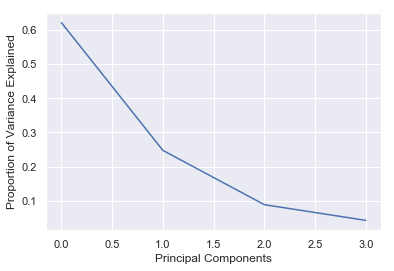

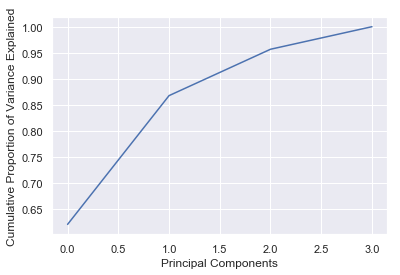

In [123]:
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Components')
plt.show()

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.xlabel('Principal Components')

plt.show()


## Lab 2: Clustering

In [124]:
# 
np.random.seed(2)
X = np.random.normal(size=(50,2))
X[:25,0] = X[:25,0]+3
X[:25,1] = X[:25,1]-4

In [125]:
#  k=2 
km_2 = KMeans(n_clusters=2, random_state=17).fit(X)
km_2.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1], dtype=int32)

In [126]:
#  K = 3

km_3 = KMeans(n_clusters=3, random_state=17).fit(X)
km_3.labels_

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 2], dtype=int32)

In [127]:
pd.Series(km_3.labels_).value_counts()

1    21
0    20
2     9
dtype: int64

In [128]:
km_3.cluster_centers_

array([[-0.27876523,  0.51224152],
       [ 2.82805911, -4.11351797],
       [ 0.69945422, -2.14934345]])

In [129]:
km_3.labels_

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 2], dtype=int32)

In [130]:
km_3.inertia_

68.97379200939726

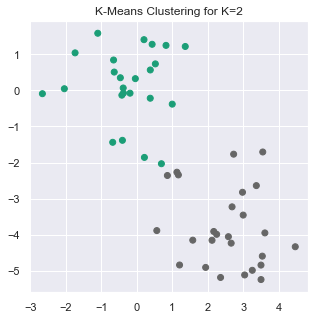

In [131]:
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=km_2.labels_, cmap=plt.cm.Dark2)
plt.title('K-Means Clustering for K=2');



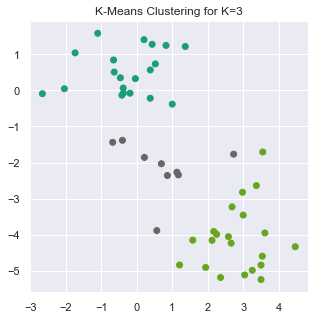

In [132]:
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=km_3.labels_, cmap=plt.cm.Dark2)
plt.title('K-Means Clustering for K=3');


In [133]:
### Hierarchical Clustering

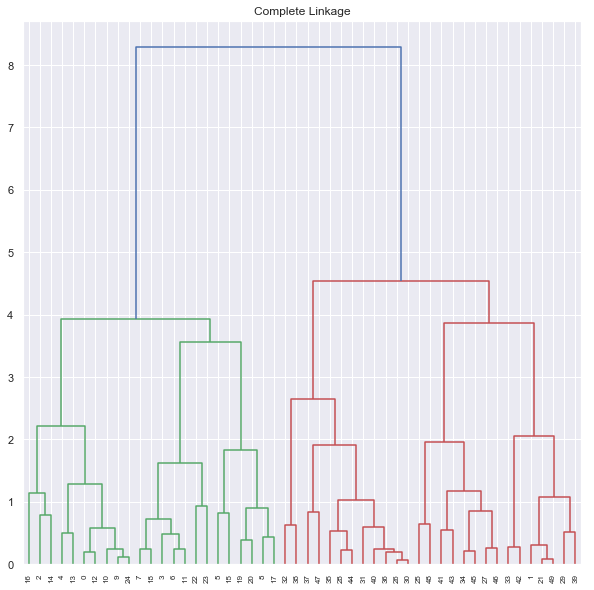

In [134]:
# Complete Linkeage

fig = plt.figure(figsize=(10,10))
dn_complete = hierarchy.dendrogram(hierarchy.complete(X))
plt.title('Complete Linkage')
plt.show();

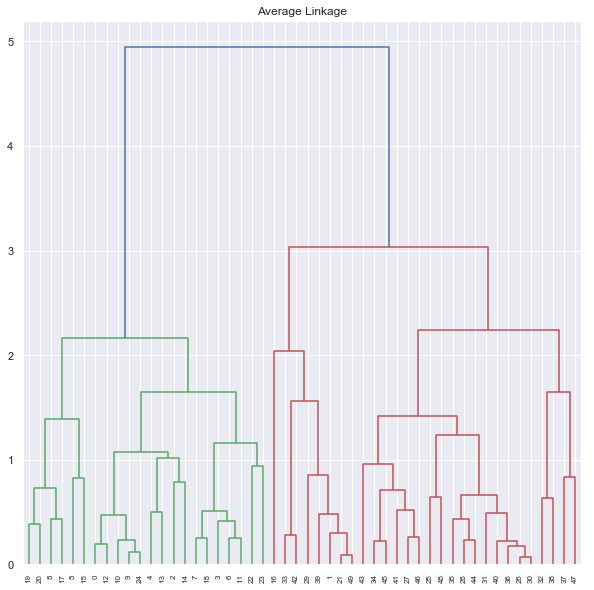

In [135]:
# Average Linkage


fig = plt.figure(figsize=(10,10))
dn_average = hierarchy.dendrogram(hierarchy.average(X))
plt.title('Average Linkage')
plt.show();

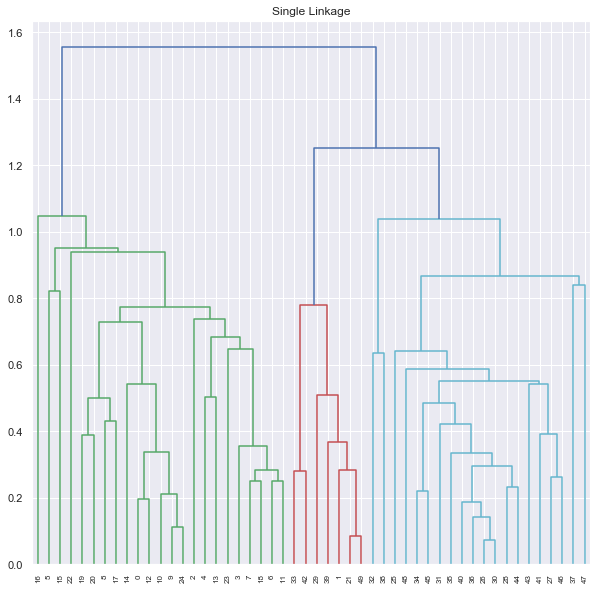

In [136]:
# Single Linkeage

fig = plt.figure(figsize=(10,10))
dn_single = hierarchy.dendrogram(hierarchy.single(X))
plt.title('Single Linkage')
plt.show();

## Lab 3: NC160 Data Example

In [137]:
df = pd.read_csv('./data/nci60_data.csv', index_col=0)
df.shape

(64, 6830)

In [138]:
X = scale(df.iloc[:, :-1])
y = pd.read_csv('./data/nci60_labs.csv', index_col=0)

In [139]:
y['x'].value_counts()

NSCLC          9
RENAL          9
MELANOMA       8
COLON          7
BREAST         7
LEUKEMIA       6
OVARIAN        6
CNS            5
PROSTATE       2
K562A-repro    1
MCF7D-repro    1
UNKNOWN        1
K562B-repro    1
MCF7A-repro    1
Name: x, dtype: int64

In [140]:
pca = PCA()
df_for_plot = pd.DataFrame(pca.fit_transform(X))

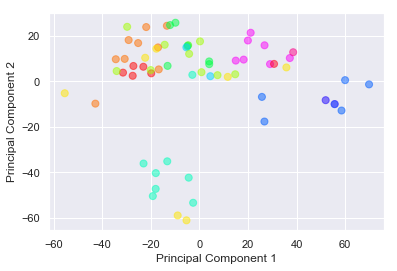

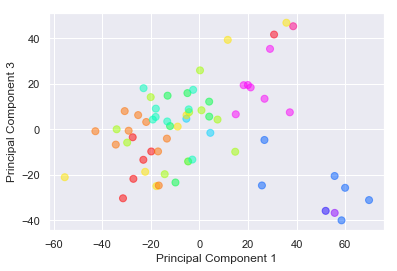

In [141]:
plt.scatter(df_for_plot.iloc[:,0], -df_for_plot.iloc[:,1], c=pd.factorize(y['x'])[0], cmap=plt.cm.hsv, alpha=0.5, s=50)
plt.ylabel('Principal Component 2')
plt.xlabel('Principal Component 1')
plt.show()
plt.scatter(df_for_plot.iloc[:,0], df_for_plot.iloc[:,2], c=pd.factorize(y['x'])[0], cmap=plt.cm.hsv, alpha=0.5, s=50)
plt.ylabel('Principal Component 3')
plt.xlabel('Principal Component 1');
plt.show()

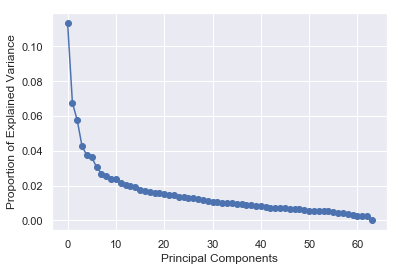

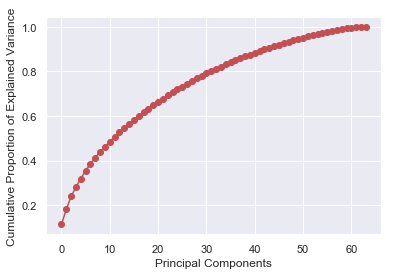

In [142]:
plt.plot(pca.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Explained Variance')
plt.xlabel('Principal Components')
plt.show()
plt.plot(np.cumsum(pca.explained_variance_ratio_), '-ro')
plt.ylabel('Cumulative Proportion of Explained Variance')
plt.xlabel('Principal Components')
plt.show()


### Clustering the Observations of the NCI60 Data

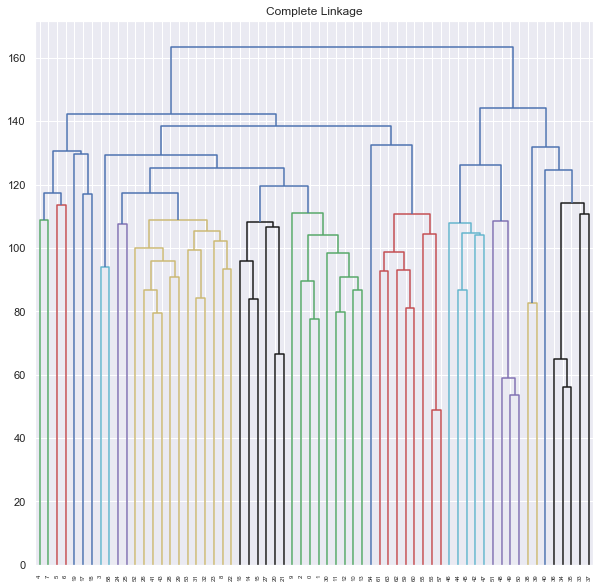

In [143]:
# Complete Linkage

fig = plt.figure(figsize=(10,10))
dn_complete = hierarchy.dendrogram(hierarchy.complete(X))
plt.title('Complete Linkage')
plt.show();

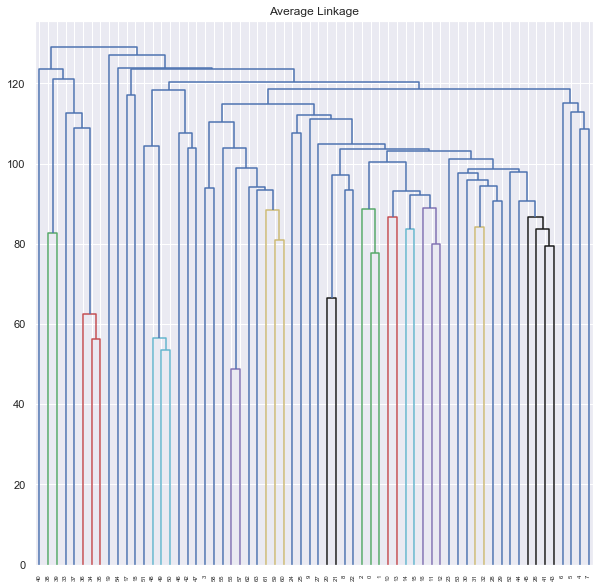

In [144]:
# Average Linkage

fig = plt.figure(figsize=(10,10))
dn_average = hierarchy.dendrogram(hierarchy.average(X))
plt.title('Average Linkage')
plt.show();

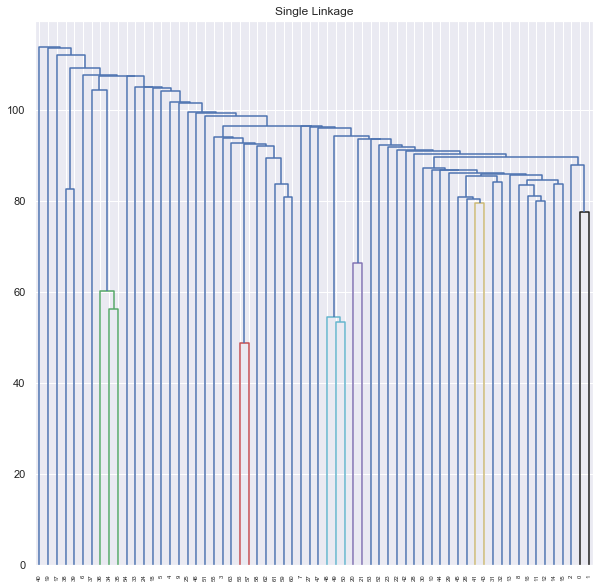

In [145]:
# Single Linkage

hc_single = hierarchy.single(X)
fig = plt.figure(figsize=(10,10))
dn_single = hierarchy.dendrogram(hc_single)
plt.title('Single Linkage')
plt.show();


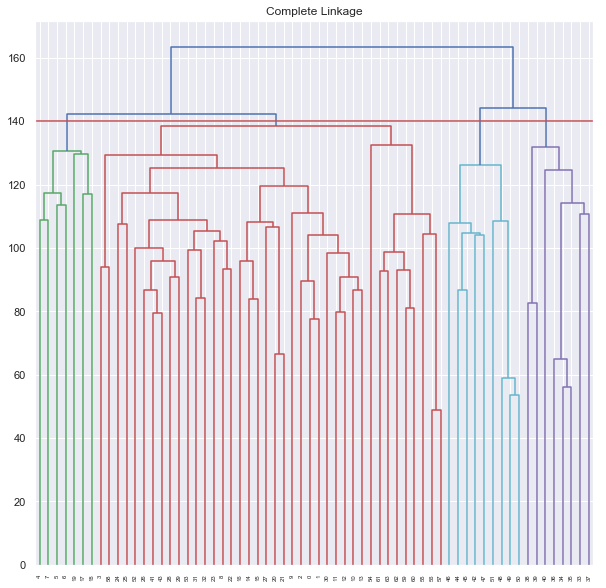

In [146]:
# Complete Linkage with threshhold at 140
fig = plt.figure(figsize=(10,10))
dn_complete = hierarchy.dendrogram(hierarchy.complete(X), color_threshold=140)
plt.axhline(y=140, xmin=0, xmax=1, color='r') # horizontal line
plt.title('Complete Linkage')
plt.show();

In [150]:
km = KMeans(n_clusters=4, random_state=17, n_init=20).fit(X)
pd.Series(km.labels_).value_counts()

3    30
0    18
1    10
2     6
dtype: int64

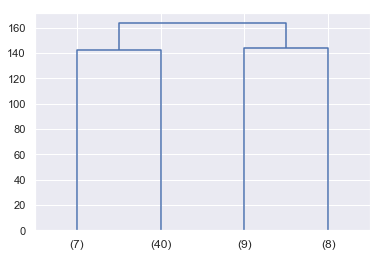

In [151]:
# Observations per Hierarchical cluster

cut4b = hierarchy.dendrogram(hierarchy.complete(X), truncate_mode='lastp', p=4, show_leaf_counts=True)

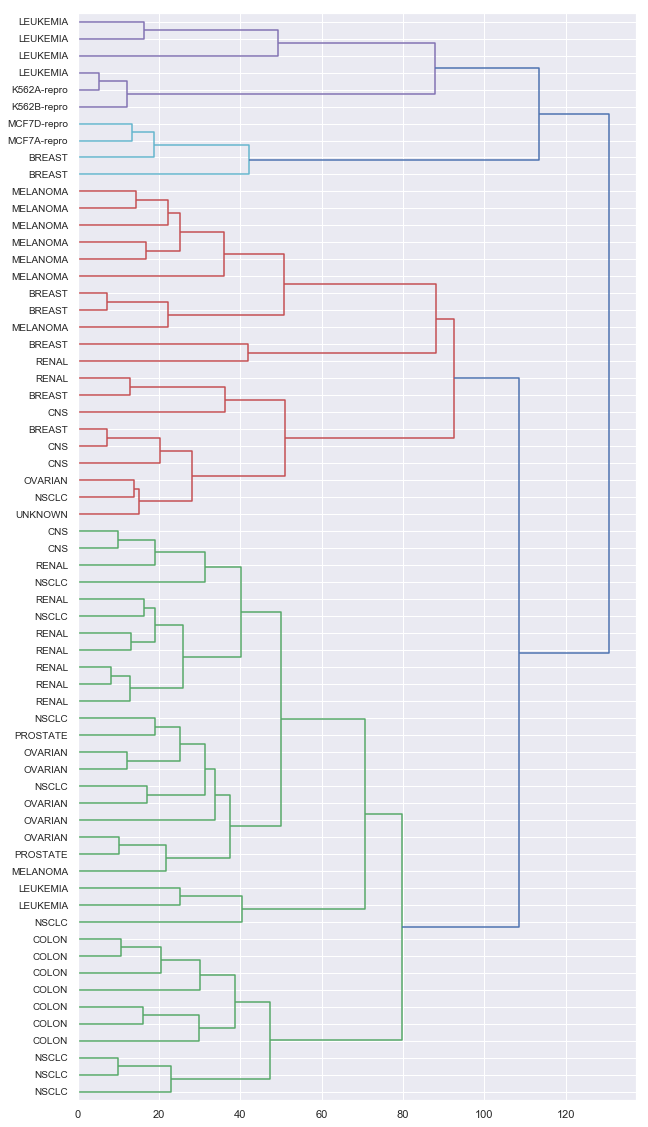

In [155]:
plt.figure(figsize=(10,20))
cluster = hierarchy.dendrogram(hierarchy.complete(pd.DataFrame(PCA().fit_transform(X)).iloc[:,:5]), 
                     labels=y['x'].values, orientation='right',
                     color_threshold=100, leaf_font_size=10)

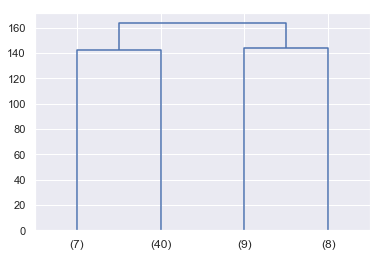

In [156]:
cut4c = hierarchy.dendrogram(hierarchy.complete(PCA().fit_transform(X)), truncate_mode='lastp', p=4,
                             show_leaf_counts=True)